In [120]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces # para cargar el dataset de caras
from sklearn.utils.validation import check_random_state # para tirar numeros al azar con semilla
from sklearn.ensemble import RandomForestRegressor
import joblib
from google.colab import files
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression





Vamos a trabajar con la base de datos de caras Olivetti. La base de datos cuenta con 400 fotografías (10 fotografías de 40 sujetos distintos). Las 10 fotografías de cada sujeto contienen ligeras variaciones (muecas, iluminación, expresiones faciales, con o sin anteojos, etc). Las imagenes son de 64 $\times$ 64.

El problema que con el que vamos a trabajar es el de **completar caras**.

Vamos a entrenar modelos de regresion con el set de entrenamiento que tomen como input la mitad superior de la imagen y den como output la mitad inferior.

Luego, le damos la mitad superior de cada una de las 5 caras que elegimos para la visualizacion, y vemos como da el resultado.


In [121]:
data, targets = fetch_olivetti_faces(return_X_y=True) # cargamos las caras
train = data[targets < 30] # seleccionamos los sujetos con targets menores y mayores a 30 para train y test
test = data[targets >= 30]  # esto nos asegura entrenar y evaluar en personas diferentes


In [122]:
n_faces = 5 # numero de caras a visualizar
rng = check_random_state(40393) # esto arma un generador de numeros aleatorios con una semilla
face_ids = rng.randint(test.shape[0], size=(n_faces, )) # genera el vector de indices de longitud 5
print(face_ids)
test = test[face_ids, :] # extrae las 5 caras


[27 95 76 49 60]


#Exploremos como diferntes de modelos de regresion se comportan, a priori suponemos que modelos basados en distancias como KNN o SVM deberian tener mejor performance ademas probamos con un RandomForest para comparar el resultado de ambos enfoques


In [123]:
n_pixels = data.shape[1] # numero de pixeles de lado
X_train = train[:, :(n_pixels + 1) // 2] # mitad superior como features para train
y_train = train[:, n_pixels // 2:] # mitad inferior como etiquetas para train
X_test = test[:, :(n_pixels + 1) // 2] # mitad superior como features para test
y_test = test[:, n_pixels // 2:]# mitad inferior como etiquetas para test

In [124]:

rf_regressor = RandomForestRegressor(n_estimators=50, random_state=42)

rf_regressor.fit(X_train, y_train)

y_pred = rf_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.014109235349574027


In [125]:
"""joblib.dump(rf_regressor, 'random_forest_model.pkl')

files.download('random_forest_model.pkl')
"""

"joblib.dump(rf_regressor, 'random_forest_model.pkl')\n\nfiles.download('random_forest_model.pkl')\n"

Caras originales
Caras Completadas Random Forest


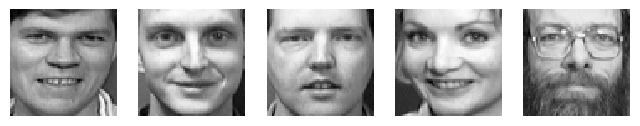

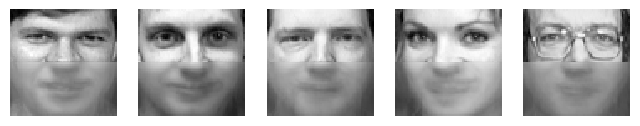

In [126]:
image_shape = (64, 64) # forma de la imagen

print('Caras originales')

fig = plt.figure(figsize = (8,8)) # seteo el tamano de la figura
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i])) # compongo la parte superior con la inferior (original)
    plt.subplot(1,5,i+1)
    plt.axis("off")
    plt.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest") # ploteo

print('Caras Completadas Random Forest')


fig = plt.figure(figsize = (8,8)) # seteo el tamano de la figura
for i in range(n_faces):
    completed_face = np.hstack((X_test[i], y_pred[i])) # compongo la parte superior con la inferior (original)
    plt.subplot(1,5,i+1)
    plt.axis("off")
    plt.imshow(completed_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest") # ploteo


In [127]:

n_neighbors = 2

knn = KNeighborsRegressor(n_neighbors,weights = 'uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.027954470366239548


Caras originales
Caras Completadas KNN


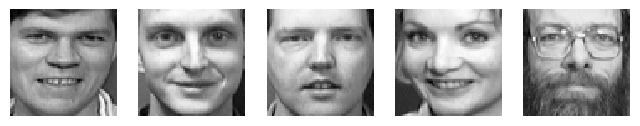

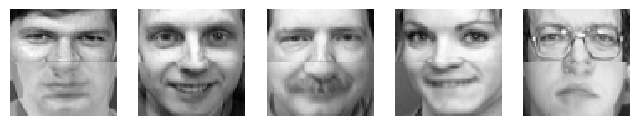

In [128]:
image_shape = (64, 64) # forma de la imagen

print('Caras originales')

fig = plt.figure(figsize = (8,8)) # seteo el tamano de la figura
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i])) # compongo la parte superior con la inferior (original)
    plt.subplot(1,5,i+1)
    plt.axis("off")
    plt.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest") # ploteo

print('Caras Completadas KNN')


fig = plt.figure(figsize = (8,8)) # seteo el tamano de la figura
for i in range(n_faces):
    completed_face = np.hstack((X_test[i], y_pred[i])) # compongo la parte superior con la inferior (original)
    plt.subplot(1,5,i+1)
    plt.axis("off")
    plt.imshow(completed_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest") # ploteo


In [129]:
"""joblib.dump(knn, 'knn_model.pkl')

files.download('knn_model.pkl')
"""

"joblib.dump(knn, 'knn_model.pkl')\n\nfiles.download('knn_model.pkl')\n"

In [130]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_lr = lr.predict(X_test)

mse = mean_squared_error(y_test, y_test_lr)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.024037163704633713


Caras originales
Caras Completadas Regresion Lineal


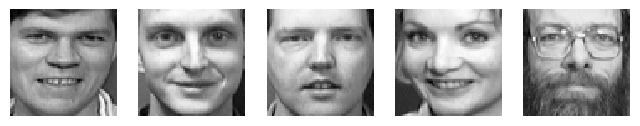

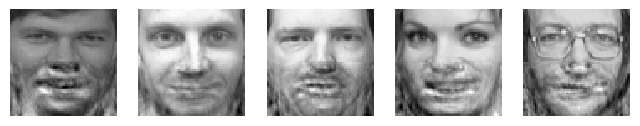

In [131]:
image_shape = (64, 64) # forma de la imagen

print('Caras originales')

fig = plt.figure(figsize = (8,8)) # seteo el tamano de la figura
for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i])) # compongo la parte superior con la inferior (original)
    plt.subplot(1,5,i+1)
    plt.axis("off")
    plt.imshow(true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest") # ploteo

print('Caras Completadas Regresion Lineal')


fig = plt.figure(figsize = (8,8)) # seteo el tamano de la figura
for i in range(n_faces):
    completed_face = np.hstack((X_test[i], y_test_lr[i])) # compongo la parte superior con la inferior (original)
    plt.subplot(1,5,i+1)
    plt.axis("off")
    plt.imshow(completed_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest") # ploteo


In [132]:
joblib.dump(lr, 'lr_model.pkl')

files.download('lr_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>